# 0.1 - Imports

In [44]:
import warnings

import pandas                as pd
import matplotlib.pyplot     as plt
import numpy                 as np
import seaborn               as sns
import matplotlib.ticker     as mtick

from sklearn.model_selection import train_test_split
from IPython.core.display    import HTML
from IPython.display         import Image


# 0.2 - Helper Function

In [34]:
display( HTML( '<style>.container { width:100% !important; }</style>') )
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
warnings.simplefilter(action='ignore', category=FutureWarning)

def descriptive_statistics(df1):
    ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
    ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
    d1 = pd.DataFrame(num_attributes.apply(np.std) ).T
    d2 = pd.DataFrame(num_attributes.apply(min)).T
    d3 = pd.DataFrame(num_attributes.apply(max)).T
    d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
    d7 = pd.DataFrame(num_attributes.apply(lambda x: np.percentile(x, 25))).T
    d8 = pd.DataFrame(num_attributes.apply(lambda x: np.percentile(x, 50))).T
    d9 = pd.DataFrame(num_attributes.apply(lambda x: np.percentile(x, 75))).T
    d10 = pd.DataFrame(num_attributes.apply(lambda x: np.percentile(x, 90))).T
    d11 = pd.DataFrame(num_attributes.apply(lambda x: np.percentile(x, 99))).T
    de_table = pd.concat([d4, ct1, ct2, d1, d5, d6, d2, d7, d8, d9, d10, d11, d3]).T.reset_index()
    de_table.columns = ['attributes', 'range', 'media', 'mediana', 'std', 'skew', 'kurtosis', 'min', '25%', '50%', '75%', '90%', '99%', 'max']
    pd.set_option('display.float_format', '{:.2f}'.format)
    pd.options.display.float_format = '{:,.2f}'.format
    return de_table

pd.options.display.float_format = None

# Define a função para formatar o eixo x em milhares
def milhares_x(x, pos):
    return '{:.0f}k'.format(x/1000)

# Define a função para formatar o eixo x em milhões
def milhoes_x(x, pos):
    return '{:.0f}m'.format(x/1000000)

# Define a função para formatar o eixo y em milhares
def milhares_y(y, pos):
    return '{:.0f}k'.format(y/1000)

# Define a função para formatar o eixo y em milhões
def milhoes_y(y, pos):
    return '{:.0f}m'.format(y/1000000)

def plot_count_percentage(data, x, title, ax):
    sns.countplot(x=x, data=data, ax=ax, order=data[x].value_counts().index)
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
    ax.set_title(title)

    total = len(data[x])
    for p in ax.patches:
        percentage = p.get_height()/total
        ax.text(p.get_x() + p.get_width()/2,
                p.get_height(),
                '{:.2%}'.format(percentage),
                ha='center',
                va='bottom')

sns.set_theme(style="whitegrid")


# 0.3 - Data

## 0.3.1 - Loading dataset

In [12]:
df_raw = pd.read_csv(R'..\data\raw\PS_20174392719_1491204439457_log.csv')

## 0.3.2 - Split dataset into training and testing sets

In [14]:
# Separating the predictor variables
X = df_raw.drop('isFraud', axis=1)
y = df_raw['isFraud']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [16]:
# showing that the division of the dataset maintained the same rate of the response variable
n_fraud_full = df_raw[df_raw['isFraud'] != 0].shape[0]
percent_fraud_full = n_fraud_full/df_raw.shape[0]

n_fraud_train = df_train[df_train['isFraud'] != 0].shape[0]
percent_fraud_test = n_fraud_train/df_train.shape[0]

n_fraud_test = df_test[df_test['isFraud'] != 0].shape[0]
percent_fraud_test = n_fraud_test/df_test.shape[0]

aux = pd.DataFrame({'FullDataset': [n_fraud_full, percent_fraud_full], 
                    'TrainDataset': [n_fraud_train, percent_fraud_test],
                    'TestDataset': [n_fraud_test, percent_fraud_test]}).rename({0: 'Total', 1: 'Percent'})

aux.loc['Total'] = aux.loc['Total'].apply(lambda x: "{:.0f}".format(x) if isinstance(x, (int, float)) else x)
aux.loc['Percent'] = aux.loc['Percent'].apply(lambda x: "{:.2%}".format(x) if isinstance(x, (int, float)) else x)

aux

,FullDataset,TrainDataset,TestDataset
Total,8213,6570,1643
Percent,0.13%,0.13%,0.13%


The train-test split maintained the same proportion of the response variable

In [17]:
# save train dataset
df_train = pd.concat([X_train, y_train], axis=1)

df_train.to_csv(R'..\data\processed\train_set.csv', index=False)

# save test dataset
df_test = pd.concat([X_test, y_test], axis=1)

df_test.to_csv(R'..\data\processed\test_set.csv', index=False)

#  1.0 - Data Description

In [18]:
df1 = df_train.copy()

## 1.1 - Data Types

In [19]:
df1.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud      int64
isFraud             int64
dtype: object

- It is not necessary to change the type of any column

## 1.2 - Data Dimensions

In [20]:
print(f'Number of Columns: {df1.shape[1]}')
print(f'Number of Rows:    {df1.shape[0]:n}')

Number of Columns: 11
Number of Rows:    5090096


## 1.3 - Check NA

In [21]:
#no pandas
df1.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
isFraud           0
dtype: int64

- It is not necessary to fill in any empty data

## 1.4 - Descriptive Statistics

In [22]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

###  1.4.1 - Numerical attributes

descriptive_statistics(df1)

In [29]:
np.percentile(df1['amount'], 99)

1617619.3199999991

In [30]:
df1[df1['amount'] == 0].shape[0]

13

All of the 13 zero amounts are of type "CASH_OUT"

([<matplotlib.axis.XTick at 0x1ec6c0e71f0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

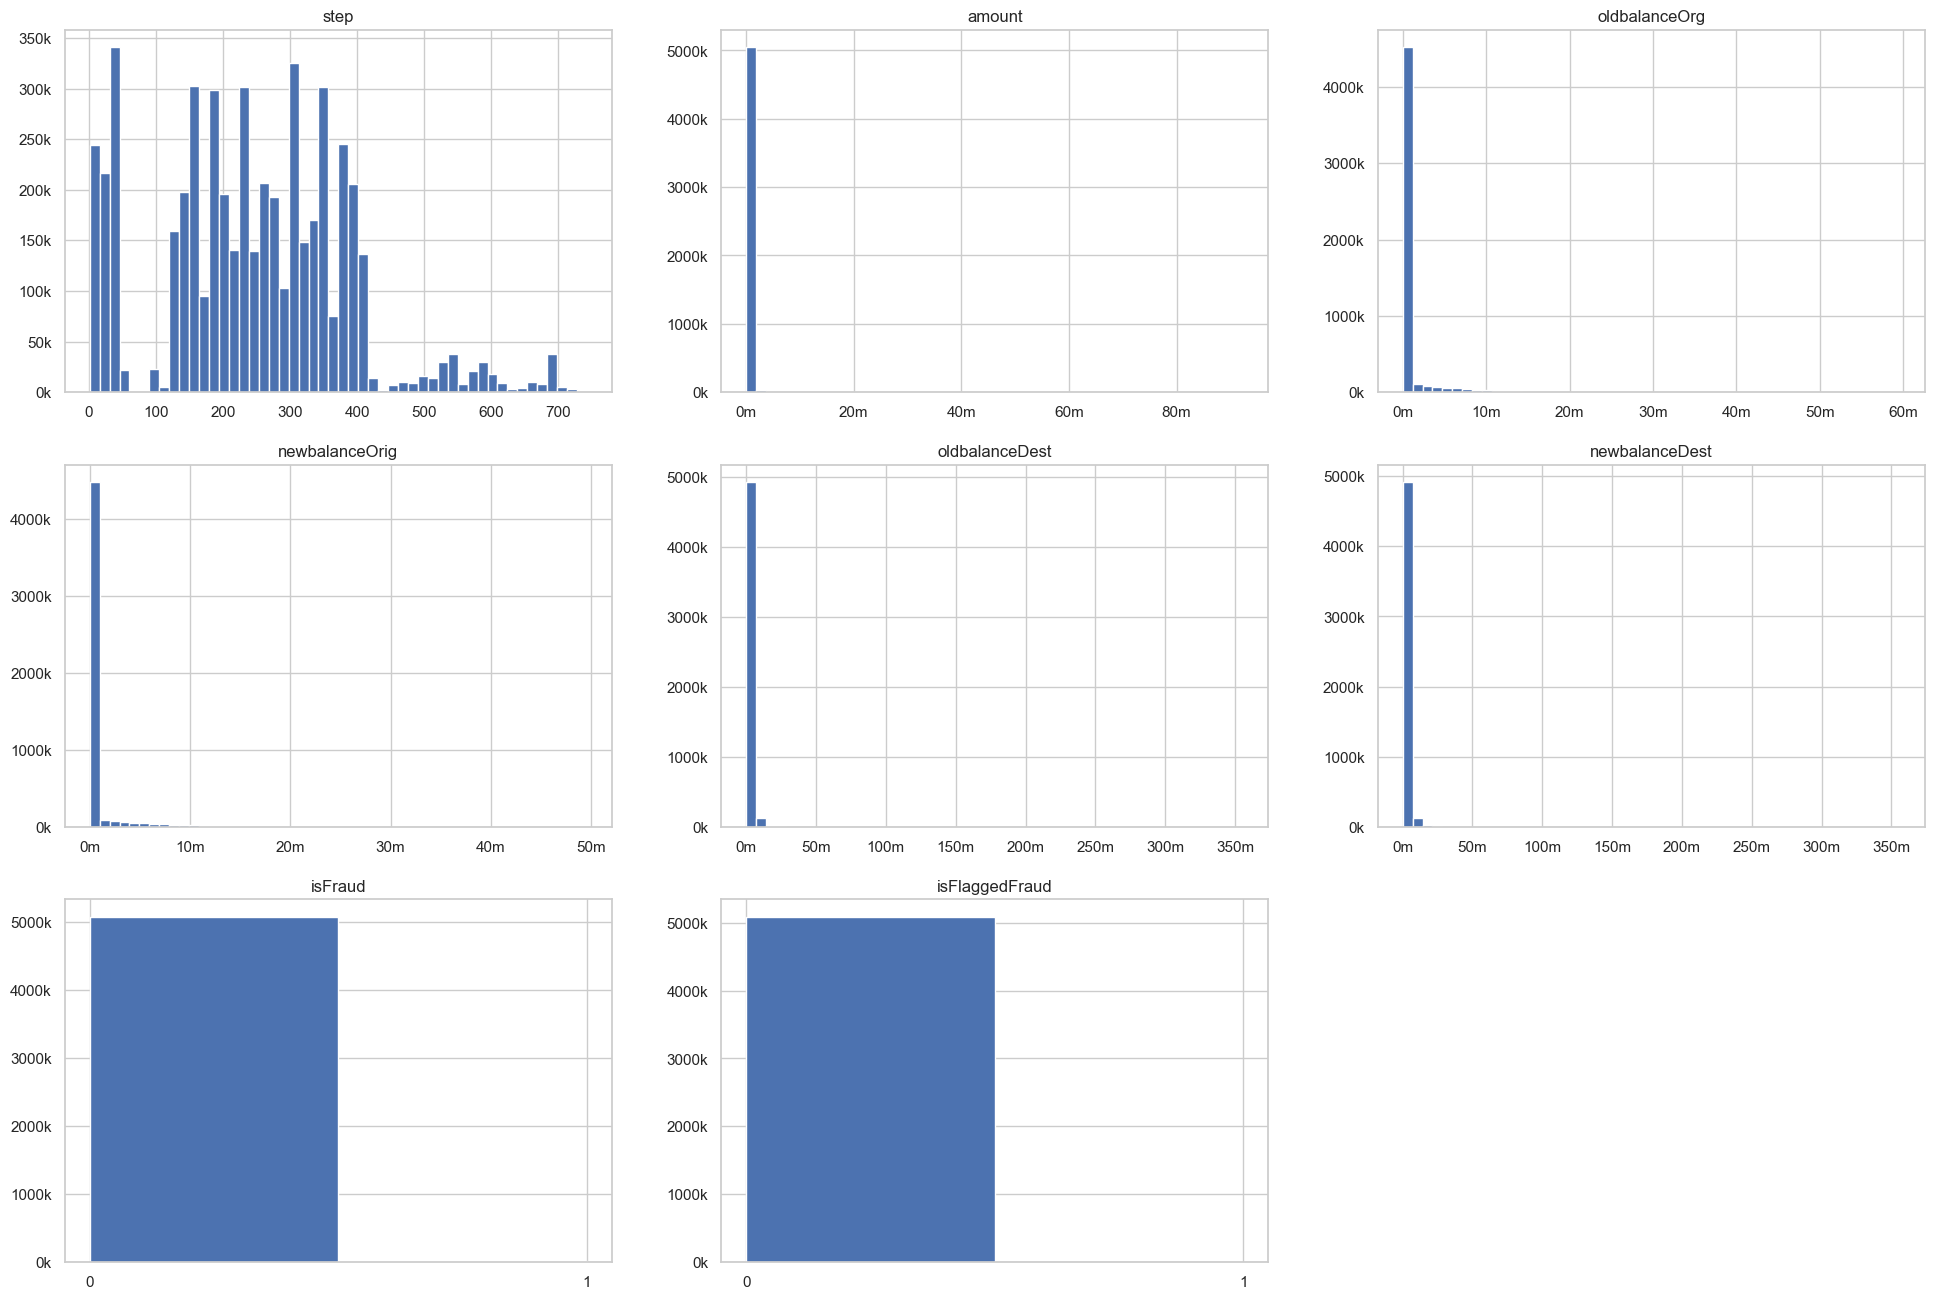

In [36]:
plt.subplot(3, 3, 1)
df1['step'].hist(bins= 50, figsize=(24,16))
plt.ticklabel_format(style = 'plain')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("step")

plt.subplot(3, 3, 2)
df1['amount'].hist(bins=50, figsize=(24,16))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("amount")

plt.subplot(3, 3, 3)
df1['oldbalanceOrg'].hist(bins=50, figsize=(24,16))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("oldbalanceOrg")

plt.subplot(3, 3, 4)
df1['newbalanceOrig'].hist(bins=50, figsize=(24,16))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("newbalanceOrig")

plt.subplot(3, 3, 5)
df1['oldbalanceDest'].hist(bins=50, figsize=(24,16))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("oldbalanceDest")

plt.subplot(3, 3, 6)
df1['newbalanceDest'].hist(bins=50, figsize=(24,16))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("newbalanceDest")

plt.subplot(3, 3, 7)
df1['isFraud'].hist(bins=2, figsize=(24,16))
plt.ticklabel_format(style = 'plain')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("isFraud")
plt.xticks([0, 1])

plt.subplot(3, 3, 8)
df1['isFlaggedFraud'].hist(bins=2, figsize=(24,16))
plt.ticklabel_format(style = 'plain')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("isFlaggedFraud")
plt.xticks([0, 1])


**Financial value features do not have negative values**

- step: A large portion of transactions were recorded in the first half of the period (90% between 1 to 399 - 10% from 400 to 743). Having a drop between steps 50 - 100, approximately.
- amount: 99% of the amounts vary up to 1.6 million. The remaining 1% varies from 1.6 million to 92 million, with the highest kurtosis of the dataset.
- oldbalanceOrg and newbalanceOrig: High Kurtosis, where most values are low (90% below 1.8/1.9 million, with 10% varying up to 59/49 million).
- oldbalanceDest and newbalanceDest: Kurtosis even higher than balanceOrig (99% below 12/13 million, with 1% varying up to 356 million).

### 1.4.2 - Categorical attributes

In [37]:
cat_attributes.describe()

,type,nameOrig,nameDest
count,5090096,5090096,5090096
unique,5,5084156,2266013
top,CASH_OUT,C724452879,C1590550415
freq,1790307,3,94


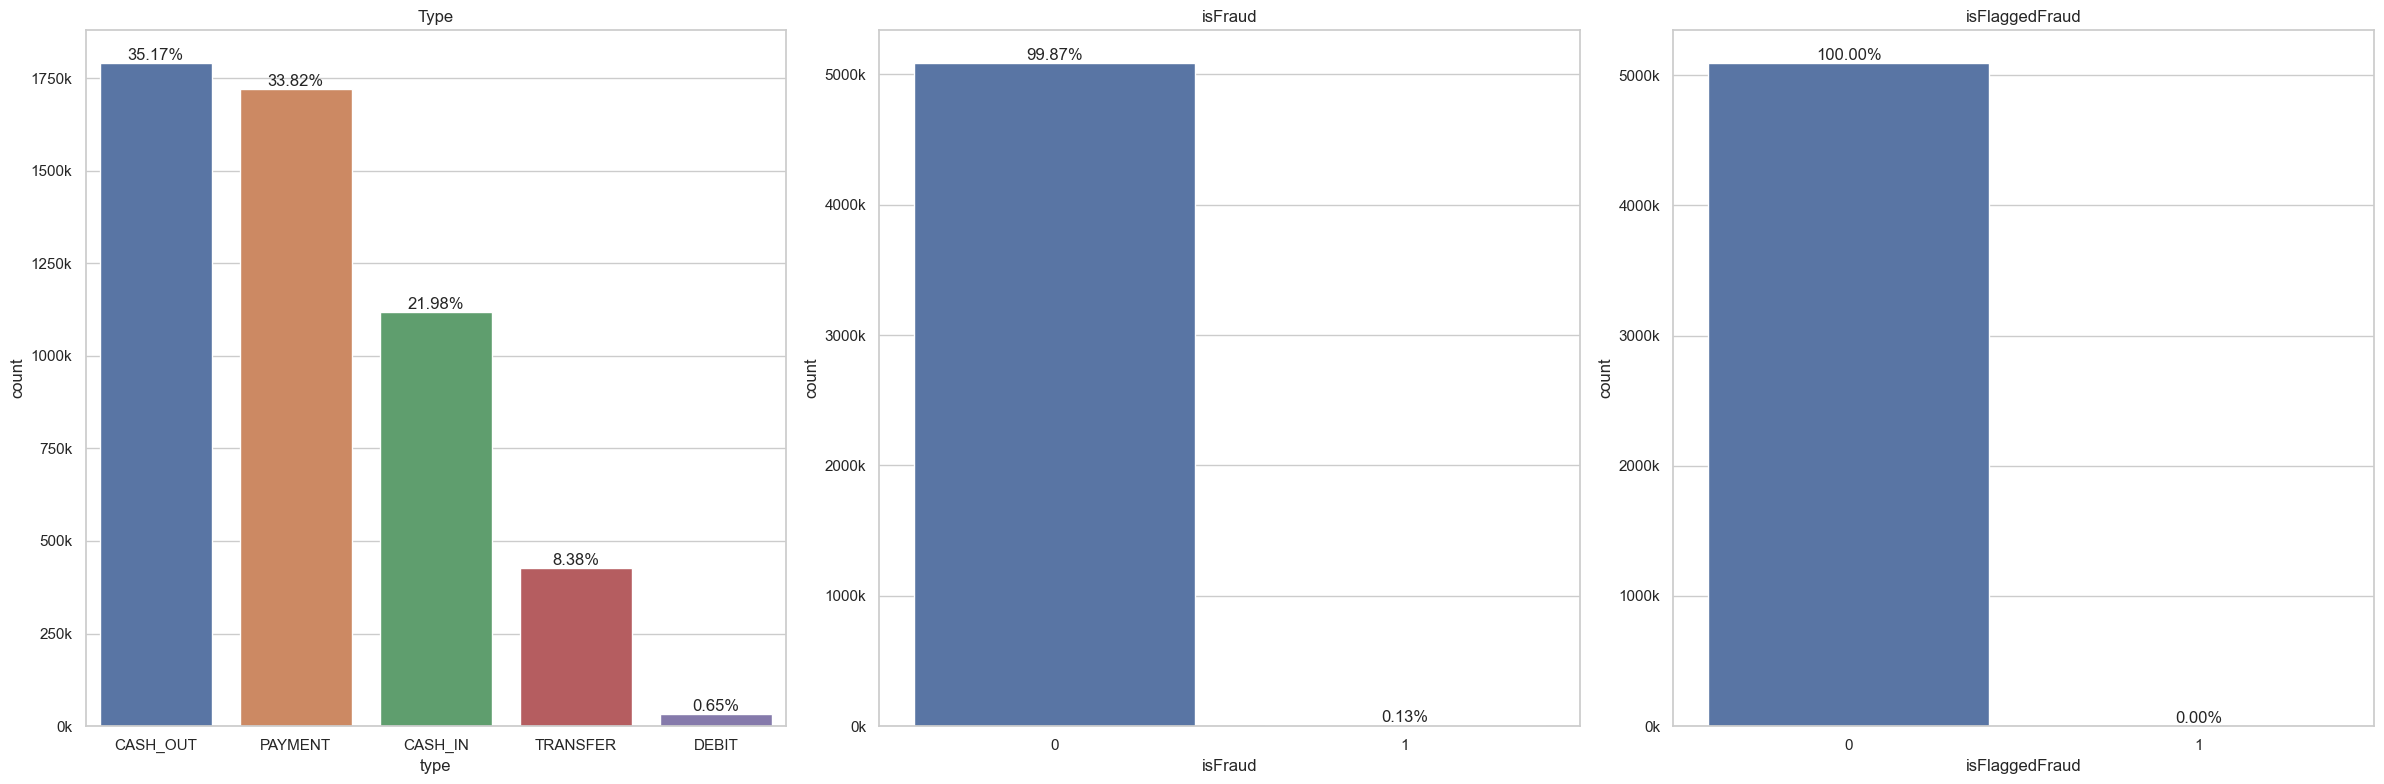

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(24,8))

plot_count_percentage(df1, 'type', 'Type', axs[0])
plot_count_percentage(df1, 'isFraud', 'isFraud', axs[1])
plot_count_percentage(df1, 'isFlaggedFraud', 'isFlaggedFraud', axs[2])

plt.tight_layout()
plt.show()

In [39]:
df1_payment = df1[df1['type'] == 'PAYMENT']
df1_cash_out = df1[df1['type'] == 'CASH_OUT']
df1_cash_in = df1[df1['type'] == 'CASH_IN']
df1_transfer = df1[df1['type'] == 'TRANSFER']
df1_debit = df1[df1['type'] == 'DEBIT']

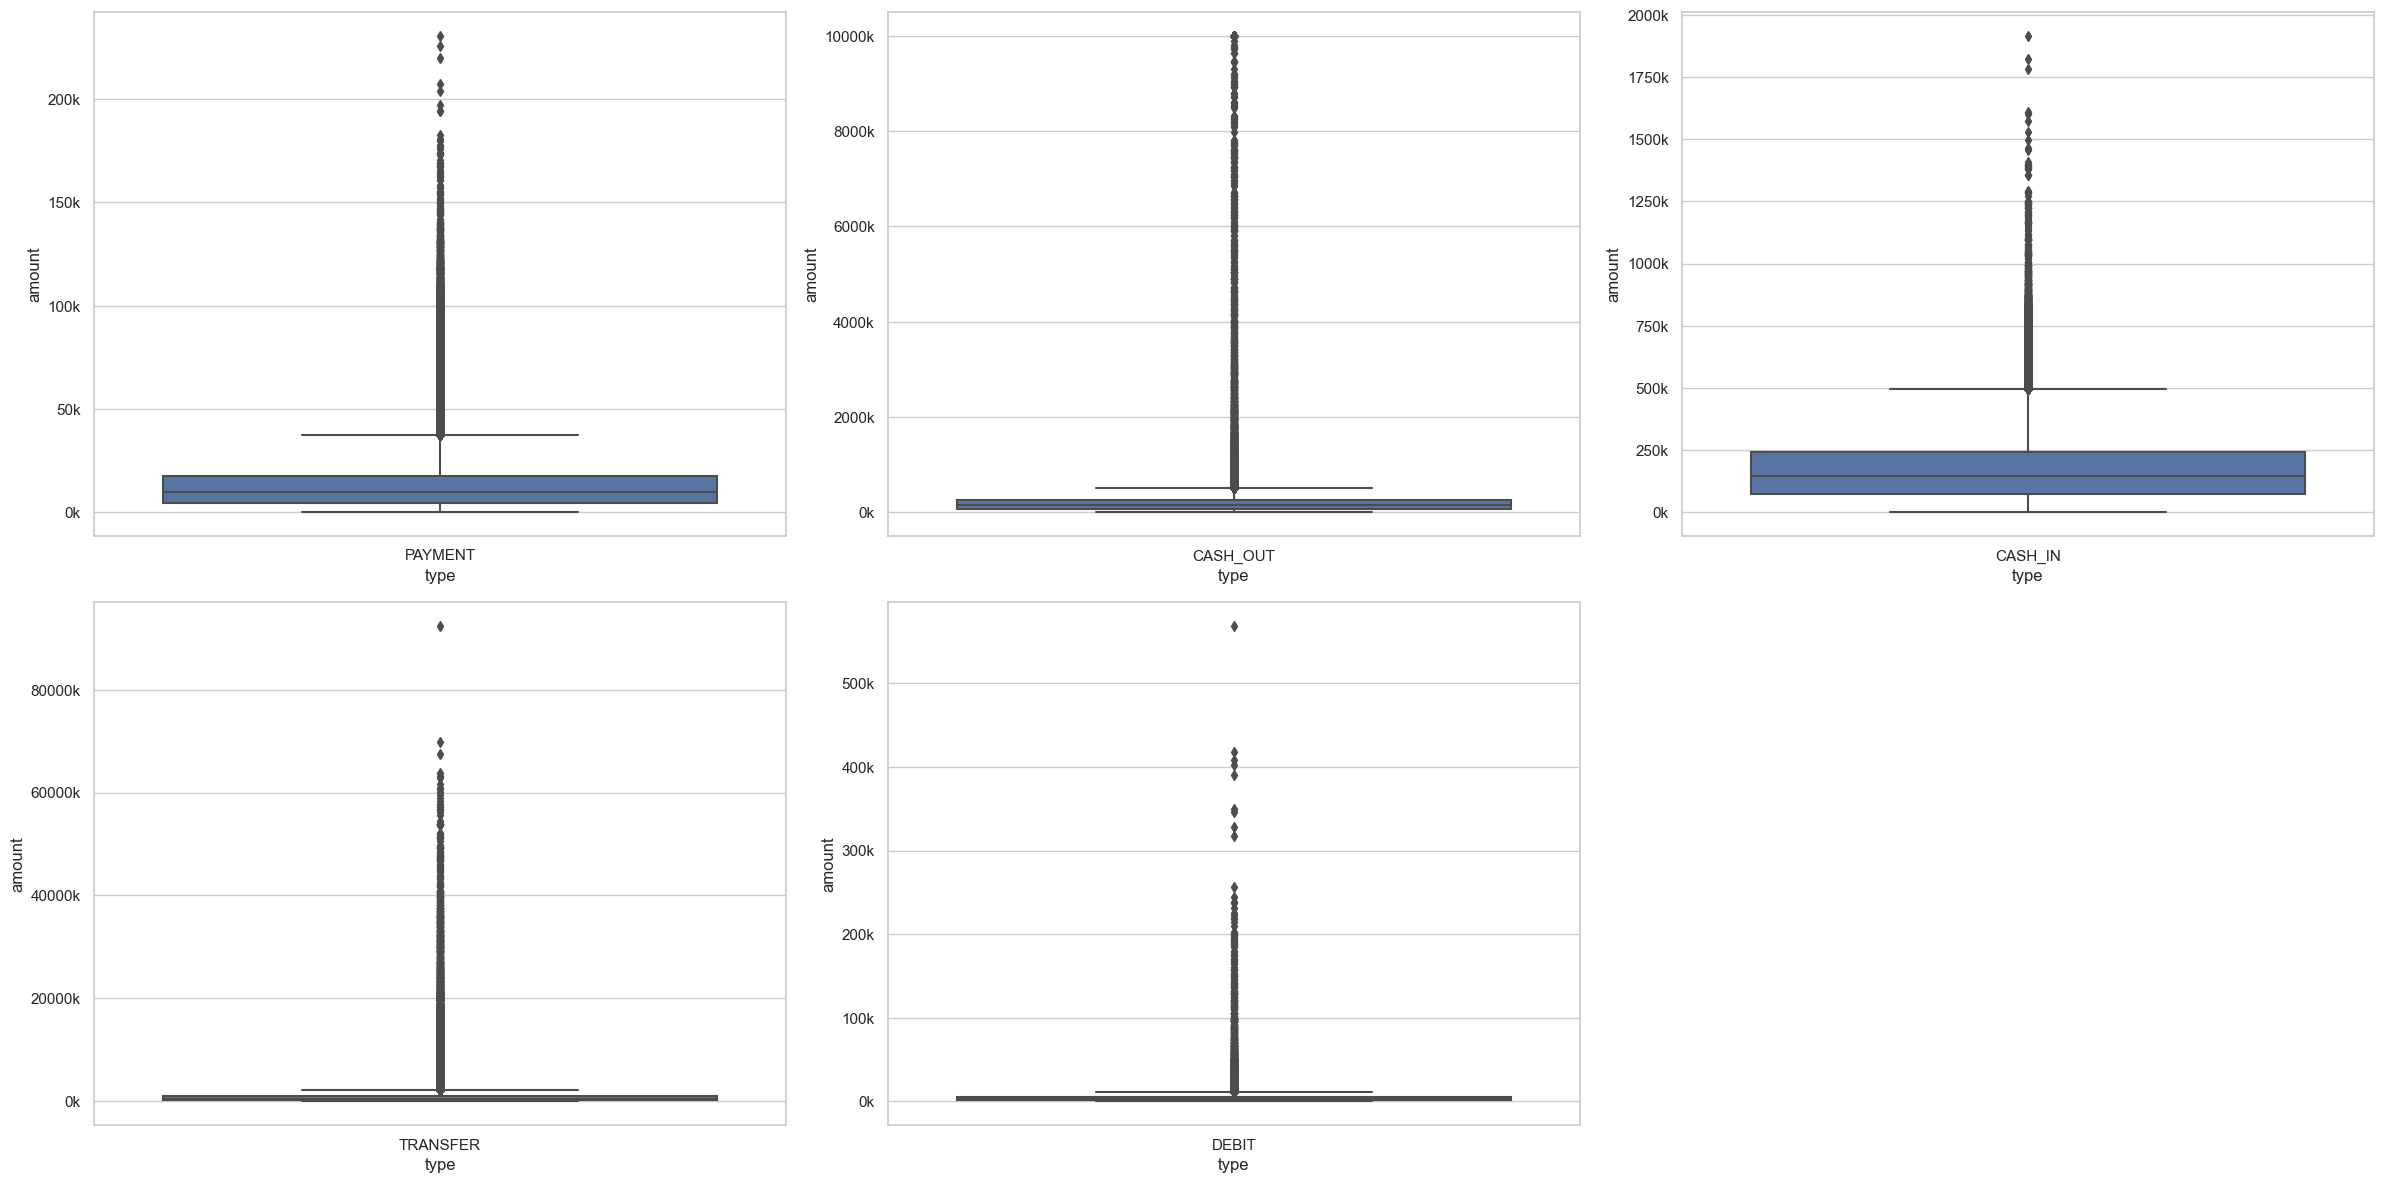

In [40]:
fig = plt.figure(figsize=(24, 12))

ax1 = fig.add_subplot(2, 3, 1)
sns.boxplot(x='type', y='amount', data=df1_payment) 
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(milhares_x))

ax2 = fig.add_subplot(2, 3, 2)
sns.boxplot(x='type', y='amount', data=df1_cash_out) 
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(milhares_x))

ax3 = fig.add_subplot(2, 3, 3)
sns.boxplot(x='type', y='amount', data=df1_cash_in) 
ax3.yaxis.set_major_formatter(mtick.FuncFormatter(milhares_x))

ax4 = fig.add_subplot(2, 3, 4)
sns.boxplot(x='type', y='amount', data=df1_transfer) 
ax4.yaxis.set_major_formatter(mtick.FuncFormatter(milhares_x))

ax5 = fig.add_subplot(2, 3, 5)
sns.boxplot(x='type', y='amount', data=df1_debit) 
ax5.yaxis.set_major_formatter(mtick.FuncFormatter(milhares_x))

plt.tight_layout()
plt.show()

In [41]:
cat_attributes['nameOrig'].value_counts()

nameOrig
C724452879     3
C1784010646    3
C1976208114    3
C2098525306    3
C1902386530    3
              ..
C1614840860    1
C964592971     1
C590958331     1
C879518006     1
C1013856770    1
Name: count, Length: 5084156, dtype: int64

In [42]:
cat_attributes['nameDest'].value_counts()

nameDest
C1590550415    94
C1286084959    87
C2083562754    86
C985934102     86
C1899073220    83
               ..
M893465911      1
M697207086      1
M792059750      1
M1133958408     1
M1721419416     1
Name: count, Length: 2266013, dtype: int64

# 2.0 - Feature Engineering

In [45]:
df2 = df1.copy()

## 2.1 - Fraud MindMap

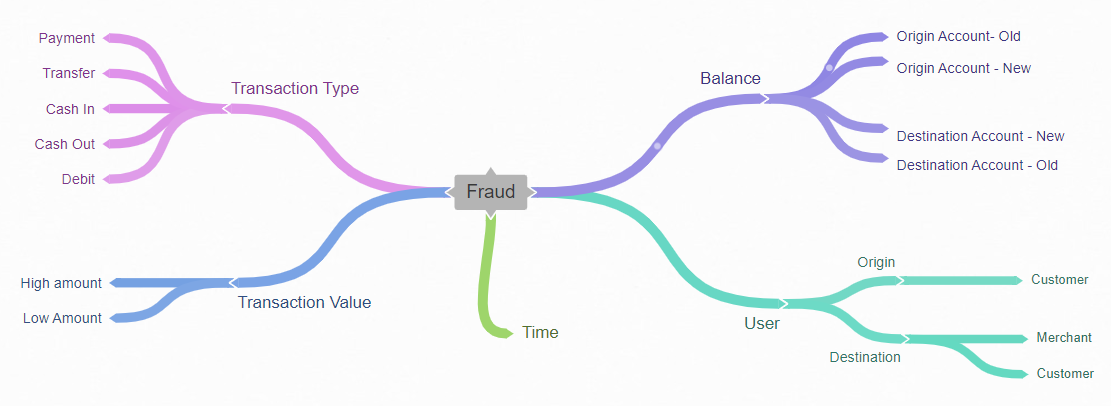

In [46]:
Image(R'..\docs\Fraud_MindMap.png')

## 2.2 - Fraud Bank Hypothesis

### 2.2.1 - Time

- H1: The majority of frauds occur in the last 5 days of the month

### 2.2.2 - Balance

- H2: The majority of frauds occur when the final balance of the origin account is 0
- H3: The majority of frauds occur when the initial balance of the origin account is above 200,000
- H4: The majority of frauds occur when the final balance of the destination account is 0
- H5: The majority of frauds occur when the initial balance of the destination account is above 2,000,000

### 2.2.3 - User

- H6: Most frauds occur when the transaction amount is different from the balance variation

### 2.2.4 - Transaction type

- H7: The majority of frauds occur with transfers or cash out

### 2.2.5 - Transaction Value

- H8: The majority of frauds occur with values above 1,000,000

### 2.2.6 - Final List

- H1: The majority of frauds occur in the last 5 days of the month
- H2: The majority of frauds occur when the final balance of the origin account is 0
- H3: The majority of frauds occur when the initial balance of the origin account is above 200,000
- H4: The majority of frauds occur when the final balance of the destination account is 0
- H5: The majority of frauds occur when the initial balance of the destination account is above 2,000,000
- H6: The majority of frauds occur when the transaction amount is different from the balance variation
- H7: The majority of frauds occur with transfers or withdrawals
- H8: The majority of frauds occur with values above 1,000,000

## 2.3 - Engineering New Features

In [47]:
# creating feature - 'day'
df2['day'] = ((df2['step'] - 1) // 24) + 1

In [48]:
# creating features for the number of transactions by nameOrig and nameDest
qtde_transações_nameOrig = df2[['nameOrig']].groupby('nameOrig').size().reset_index(name='nameOrigtransactionscount')
qtde_transações_nameDest = df2[['nameDest']].groupby('nameDest').size().reset_index(name='nameDesttransactionscount')

df2 = df2.merge(qtde_transações_nameOrig, how='left', on='nameOrig')
df2 = df2.merge(qtde_transações_nameDest, how='left', on='nameDest')

In [49]:
#Creating feature of balance variation
df2['balancevariationOrig'] = df2.apply(lambda x: x['newbalanceOrig'] - x['oldbalanceOrg'], axis=1)
df2['balancevariationDest'] = df2.apply(lambda x: x['newbalanceDest'] - x['oldbalanceDest'], axis=1)

In [50]:
#Creating feature amountXbalancevariationOrig and amountXbalancevariationDest
df2['amountEqualbalancevariationOrig'] = (abs(round(df2['amount'], 2) + round(df2['balancevariationOrig'], 2)) <= 0.02).astype(int)
df2['amountEqualbalancevariationDest'] = (abs(round(df2['amount'], 2) + round(-df2['balancevariationDest'], 2)) <= 0.02).astype(int)

#CASH_IN generates an 'amountEqualbalancevariation' with opposite signal to the other transaction types
cash_in = df2['type'] == "CASH_IN"
df2.loc[cash_in, 'amountEqualbalancevariationOrig'] = (abs(round(df2.loc[cash_in, 'amount'], 2) + round(-df2.loc[cash_in, 'balancevariationOrig'], 2)) <= 0.02).astype(int)
df2.loc[cash_in, 'amountEqualbalancevariationDest'] = (abs(round(df2.loc[cash_in, 'amount'], 2) + round(df2.loc[cash_in, 'balancevariationDest'], 2)) <= 0.02).astype(int)

In [51]:
#Creating feature MerchantDest
df2['MerchantDest'] = df2['nameDest'].apply(lambda x: 1 if 'M' in x else 0)

In [52]:
# Reorganizing the dataframe columns
df2 = df2[['step', 'day', 'type', 'amount', 
          'nameOrig', 'nameOrigtransactionscount', 'oldbalanceOrg', 'newbalanceOrig', 'balancevariationOrig', 'amountEqualbalancevariationOrig', 
          'nameDest', 'nameDesttransactionscount', 'oldbalanceDest', 'newbalanceDest', 'balancevariationDest', 'amountEqualbalancevariationDest', 'MerchantDest', 
          'isFlaggedFraud', 'isFraud']]

In [53]:
#changing to int64 type
df2['amountEqualbalancevariationOrig'] = df2['amountEqualbalancevariationOrig'].astype('int64')
df2['amountEqualbalancevariationDest'] = df2['amountEqualbalancevariationDest'].astype('int64')